In [11]:
import os 
import pandas as pd
import numpy as np
from pydub import AudioSegment

import IPython.display as ipd

import librosa
import librosa.display
import matplotlib.pyplot as plt

import processing

In [12]:
audio_folder = '../../data/ICBHI_final_database'

In [13]:
df_info = pd.read_csv('../../data/info_dataset.csv')

In [14]:
#audio_subject = '222_1b1_Pr_sc_Meditron'  #wheeze example
audio_subject = '124_1b1_Pl_sc_Litt3200' #crackle example
audio_data_file, audio_event_file = processing.load_file_from_recording_name(audio_folder,audio_subject)
data_filtered = processing.preprocess_data(audio_data_file, audio_event_file)

/Users/bastienorset/Documents/git/respiratory_sound/.venv/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  return f(*args, **kwargs)


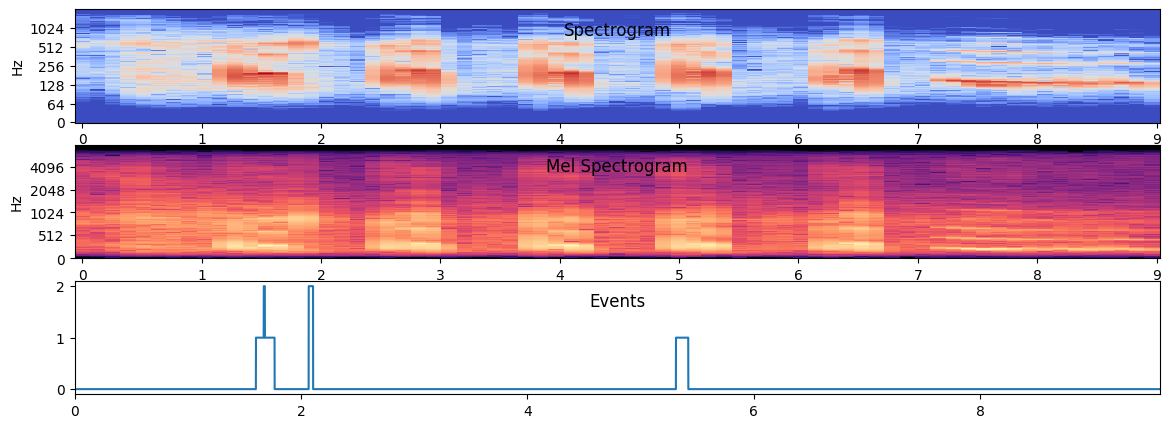

In [15]:
X = librosa.stft(data_filtered['data'],center=False)
Xdb = librosa.amplitude_to_db(abs(X))
S_dB = librosa.power_to_db(X, ref=np.max)

f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(311)
librosa.display.specshow(Xdb, sr=data_filtered['fs'], x_axis='time', y_axis='log')
ax.set_title('Spectrogram',y=0.7)
ax = f.add_subplot(312)
librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel', sr=data_filtered['fs'],
                          fmax=8000, ax=ax)
ax.set_title('Mel Spectrogram',y=0.7)
ax = f.add_subplot(313)
ax.plot(data_filtered['time'],data_filtered['label'])
ax.set_xlim([data_filtered['time'][0],data_filtered['time'][-1]])
ax.set_title('Events',y=0.7)
ipd.Audio(audio_data_file)

In [10]:
feature = processing.extract_features(data_filtered)